In [1]:
# CNN FOR MNIST DATASETS
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.preprocessing import image
from matplotlib.pyplot import imshow
import numpy as np

C:\Users\smsaurabhv\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
 %matplotlib inline

In [4]:
shapeoftraindatasets =x_train.shape
train_example = shapeoftraindatasets[0]
heightofimage = shapeoftraindatasets[1]
widthofimage =shapeoftraindatasets[2]
print("shape of x_xtrain images")
print(shapeoftraindatasets)
print("total num of images in datasets")
print(train_example)
print("height of image")
print(heightofimage)
print("width of image")
print(widthofimage)

shape of x_xtrain images
(60000, 28, 28)
total num of images in datasets
60000
height of image
28
width of image
28


In [5]:
# print some pics from datasets
from matplotlib import pyplot as plt
fig = plt.figure()

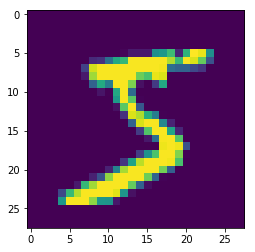

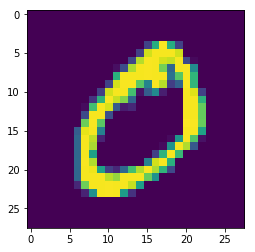

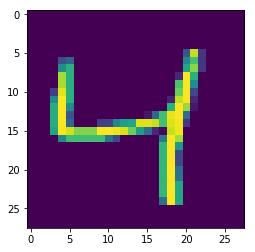

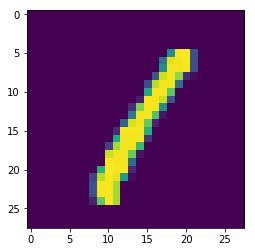

In [6]:
for i  in range(4):
    plt.imshow(x_train[i], interpolation='nearest')
    plt.show()

In [7]:
print("y_train in images")
print(y_train)

y_train in images
[5 0 4 ... 5 6 8]


In [8]:
# normalizing images 
x_train = x_train/255.0
x_test = x_test/255.0
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [9]:
inputshape = x_train.shape[1:]
numclass=10

In [10]:
print(inputshape)
y_train = keras.utils.to_categorical(y_train, numclass)
y_test = keras.utils.to_categorical(y_test, numclass)
print(y_train.shape)
print(y_test.shape)


(28, 28, 1)
(60000, 10)
(10000, 10)


In [11]:
#define hyper parameters
batchsize=128
epoch=12


In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=inputshape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(numclass, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batchsize,epochs=epoch,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 158s 3ms/step - loss: 0.2722 - acc: 0.9156 - val_loss: 0.0601 - val_acc: 0.9825
Epoch 2/12
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0873 - acc: 0.9729 - val_loss: 0.0369 - val_acc: 0.9869
Epoch 3/12
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0649 - acc: 0.9806 - val_loss: 0.0339 - val_acc: 0.9882
Epoch 4/12
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0530 - acc: 0.9838 - val_loss: 0.0320 - val_acc: 0.9888
Epoch 5/12
60000/60000 [==============================] - 162s 3ms/step - loss: 0.0462 - acc: 0.9859 - val_loss: 0.0285 - val_acc: 0.9901
Epoch 6/12
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0401 - acc: 0.9877 - val_loss: 0.0310 - val_acc: 0.9898
Epoch 7/12
60000/60000 [==============================] - 158s 3ms/step - loss: 0.0367 - acc: 0.9895 - val_loss: 0.0272 - 

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028893056331675687
Test accuracy: 0.9908


In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=inputshape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(numclass, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batchsize,epochs=epoch,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 149s 2ms/step - loss: 0.1896 - acc: 0.9422 - val_loss: 0.0602 - val_acc: 0.9799
Epoch 2/12
60000/60000 [==============================] - 146s 2ms/step - loss: 0.0457 - acc: 0.9864 - val_loss: 0.0387 - val_acc: 0.9872
Epoch 3/12
60000/60000 [==============================] - 146s 2ms/step - loss: 0.0283 - acc: 0.9912 - val_loss: 0.0301 - val_acc: 0.9905
Epoch 4/12
60000/60000 [==============================] - 146s 2ms/step - loss: 0.0186 - acc: 0.9945 - val_loss: 0.0312 - val_acc: 0.9900
Epoch 5/12
60000/60000 [==============================] - 154s 3ms/step - loss: 0.0121 - acc: 0.9965 - val_loss: 0.0314 - val_acc: 0.9911
Epoch 6/12
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0093 - acc: 0.9972 - val_loss: 0.0339 - val_acc: 0.9909
Epoch 7/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0061 - acc: 0.9982 - val_loss: 0.0400 - 

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


(1, 28, 28, 1)


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

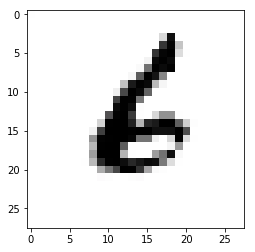

In [16]:
img_path = 'minsttest.png'
img = image.load_img(img_path, target_size=(28, 28))
imshow(img)
x = np.array(image.img_to_array(img))
x=x[:,:,0]
x=x.reshape(28,28,1)
x = np.expand_dims(x, axis=0)
print(x.shape)
model.predict(x)

(1, 28, 28, 1)


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

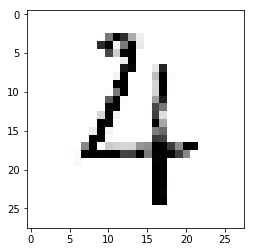

In [17]:
img_path = 'minsttest2.png'
img = image.load_img(img_path, target_size=(28, 28))
imshow(img)
x = np.array(image.img_to_array(img))
x=x[:,:,0]
x=x.reshape(28,28,1)
x = np.expand_dims(x, axis=0)
print(x.shape)
model.predict(x)

(1, 28, 28, 1)


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

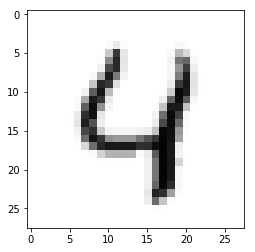

In [18]:
img_path = 'minsttest3.png'
img = image.load_img(img_path, target_size=(28, 28))
imshow(img)
x = np.array(image.img_to_array(img))
x=x[:,:,0]
x=x.reshape(28,28,1)
x = np.expand_dims(x, axis=0)
print(x.shape)
model.predict(x)

(1, 28, 28, 1)


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.8072273e-36, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

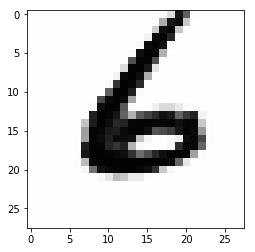

In [19]:
img_path = 'minsttest4.png'
img = image.load_img(img_path, target_size=(28, 28))
imshow(img)
x = np.array(image.img_to_array(img))
x=x[:,:,0]
x=x.reshape(28,28,1)
x = np.expand_dims(x, axis=0)
print(x.shape)
model.predict(x)

(1, 28, 28, 1)


C:\Users\smsaurabhv\Anaconda3\lib\site-packages\PIL\Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

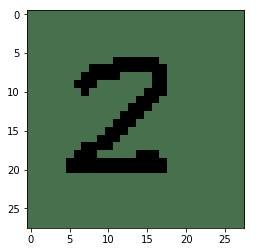

In [20]:
img_path = 'minsttest5.png'
img = image.load_img(img_path, target_size=(28, 28))
imshow(img)
x = np.array(image.img_to_array(img))
x=x[:,:,0]
x=x.reshape(28,28,1)
x = np.expand_dims(x, axis=0)
print(x.shape)
model.predict(x)

(1, 28, 28, 1)


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

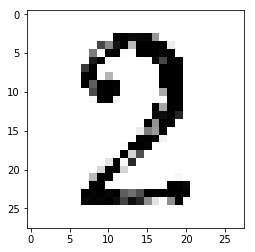

In [21]:
img_path = 'minsttes7.jpeg'
img = image.load_img(img_path, target_size=(28, 28))
imshow(img)
x = np.array(image.img_to_array(img))
x=x[:,:,0]
x=x.reshape(28,28,1)
x = np.expand_dims(x, axis=0)
print(x.shape)
model.predict(x)